# Causal Modelling

## Importing working Libraries and Scripts

In [1]:
import warnings
# silence warnings
warnings.filterwarnings("ignore")

from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image
import pandas as pd

import sys
from typing import Tuple


In [2]:
# Creating a Structural Model
sm = StructureModel()

# Initial Full Train Data Causality Graph

## Data With Outlier Removed and Normalized

In [5]:
# Outlier Revalued, MinMaxed And Normalized Data
data_1 = pd.read_csv('../data/clean_add_out_removed_normalized.csv')


In [6]:
# Constructing Causality Graph from Dataframe
sm_data_1 = from_pandas(data_1.iloc[:, 1:], w_threshold=0.8)


In [77]:
# Drawing Settings
# Changing attributes of specific nodes
node_attributes = {
    "diagnosis": {  # We change the attributes of the node "Age"
        "shape": "star",
        "style": "filled",
        "width": 0.6,
        "penwidth": "1",  # Thickness of the boundary
        "color": "#4a90e2d9",
        "orientation": 25,  # rotate node
    },
    "fontsize": 0.1
}

graph_attributes = {
    "scale": "1",
    "size": 5,
    "label": "Breast Cancer Causality model",
    "fontcolor": "#FFFFFFD9",
    "fontname": "Helvetica",
    "fontsize": 25,
    "dpi": 200,  # resolution
    "labeljust": "l",  # This sets the title to be at the left
    "labelloc": "t",  # This sets the title to be at the top
}


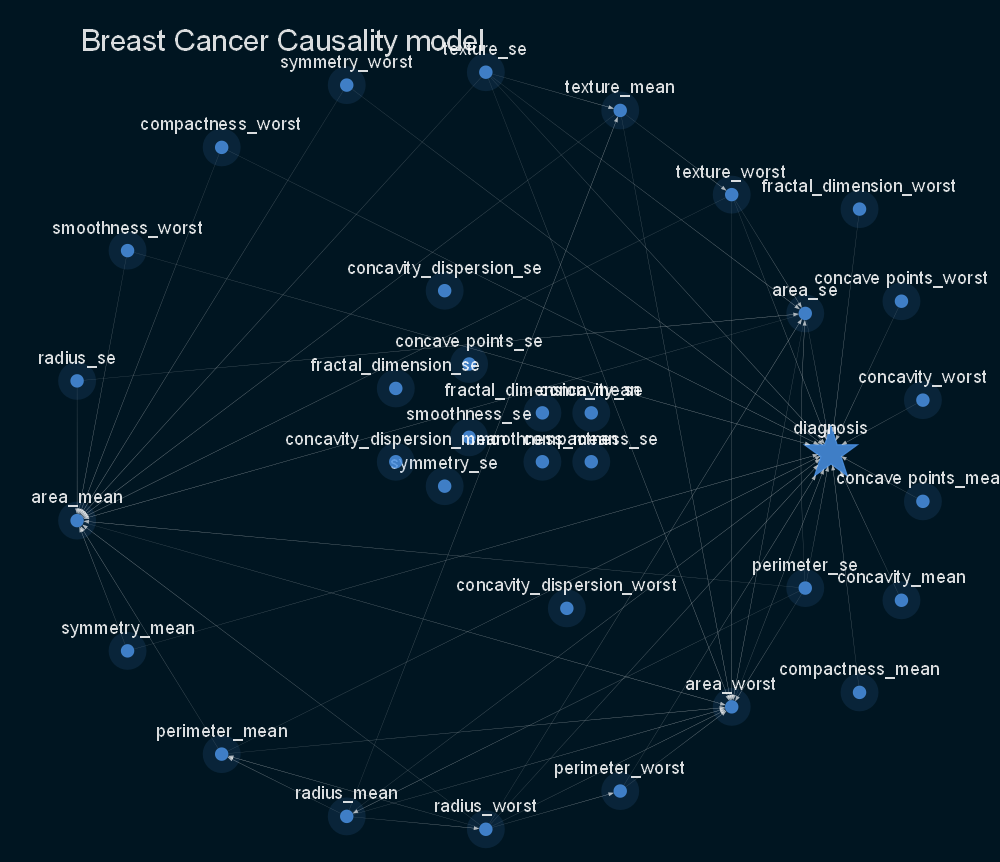

In [56]:
# Visualizing resulting graph only considering edges 0.8 and above threshold
# sm_data_1.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm_data_1,
    prog="circo",
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    all_edge_attributes=EDGE_STYLE.WEAK)
    
Image(viz.draw(format='png'))


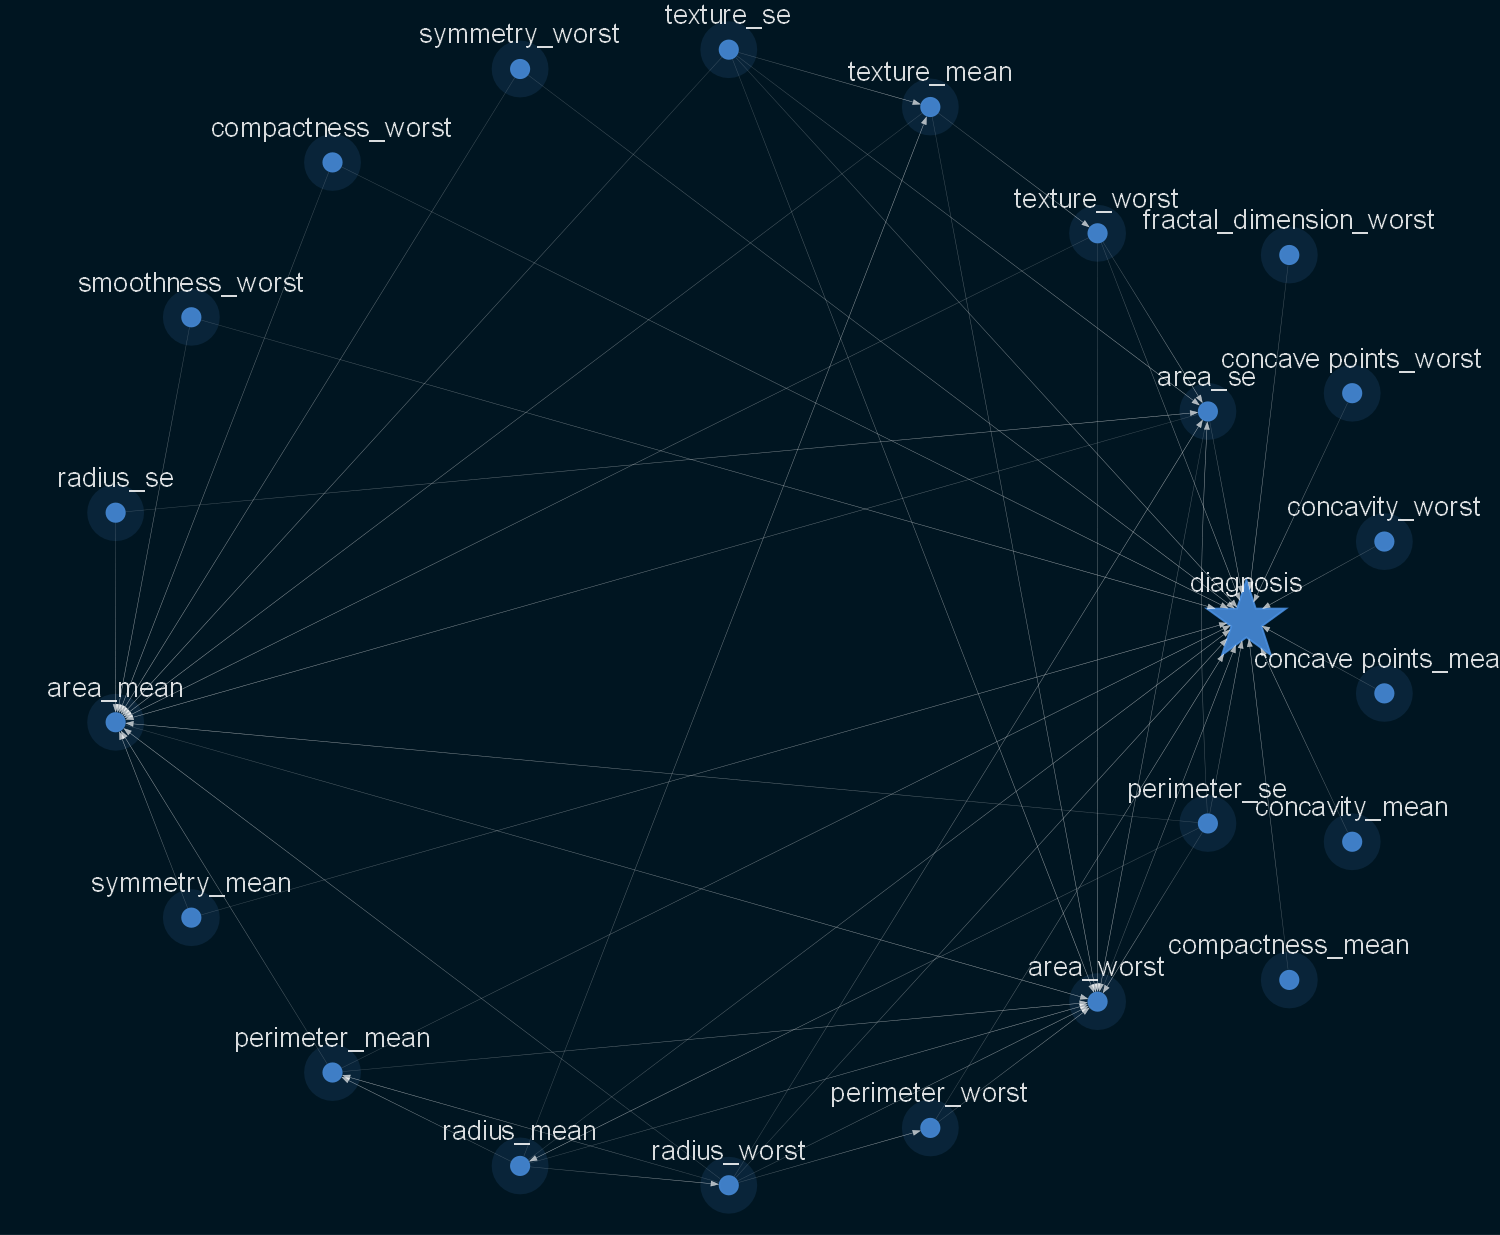

In [38]:
sm_data_1_bg = sm_data_1.get_largest_subgraph()
viz = plot_structure(
    sm_data_1_bg,
    prog="circo",
    graph_attributes={"scale": "1","size": 5},
    node_attributes=node_attributes,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


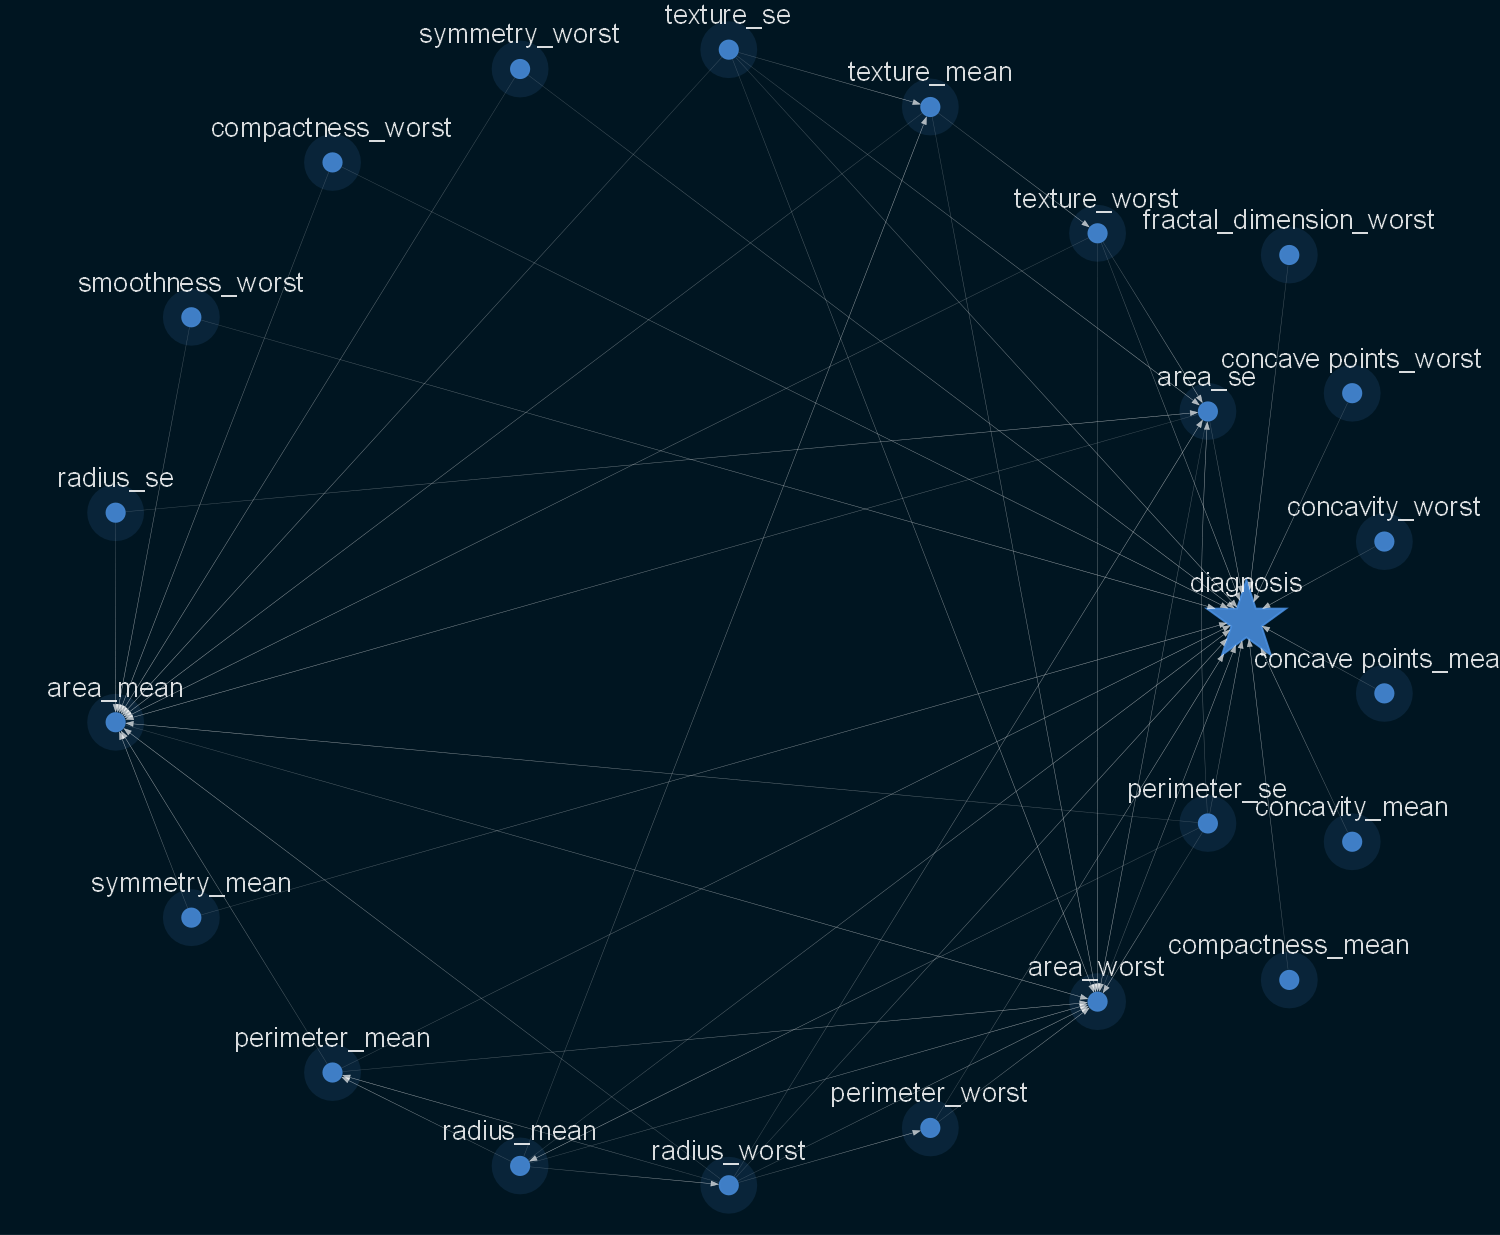

In [118]:
target = sm_data_1_bg.get_target_subgraph('diagnosis')
viz = plot_structure(
    target,
    prog="circo",
    graph_attributes={"scale": "1", "size": 5},
    node_attributes=node_attributes,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


In [119]:
edges = list(target.edges())
important_features_d1 = []
for start,end in edges:
    if(end == 'diagnosis'):
        important_features_d1.append(start)

important_features_d1

['radius_mean',
 'perimeter_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'texture_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

## Data with Outlier Values Revalued

In [96]:
# Outliers removed and Normalized with out data Addition
data_2 = pd.read_csv('../data/clean_out_removed_normalized.csv')


In [97]:
# Constructing Causality Graph from Dataframe
sm_data_2 = from_pandas(data_2.iloc[:, 1:], w_threshold=0.8)


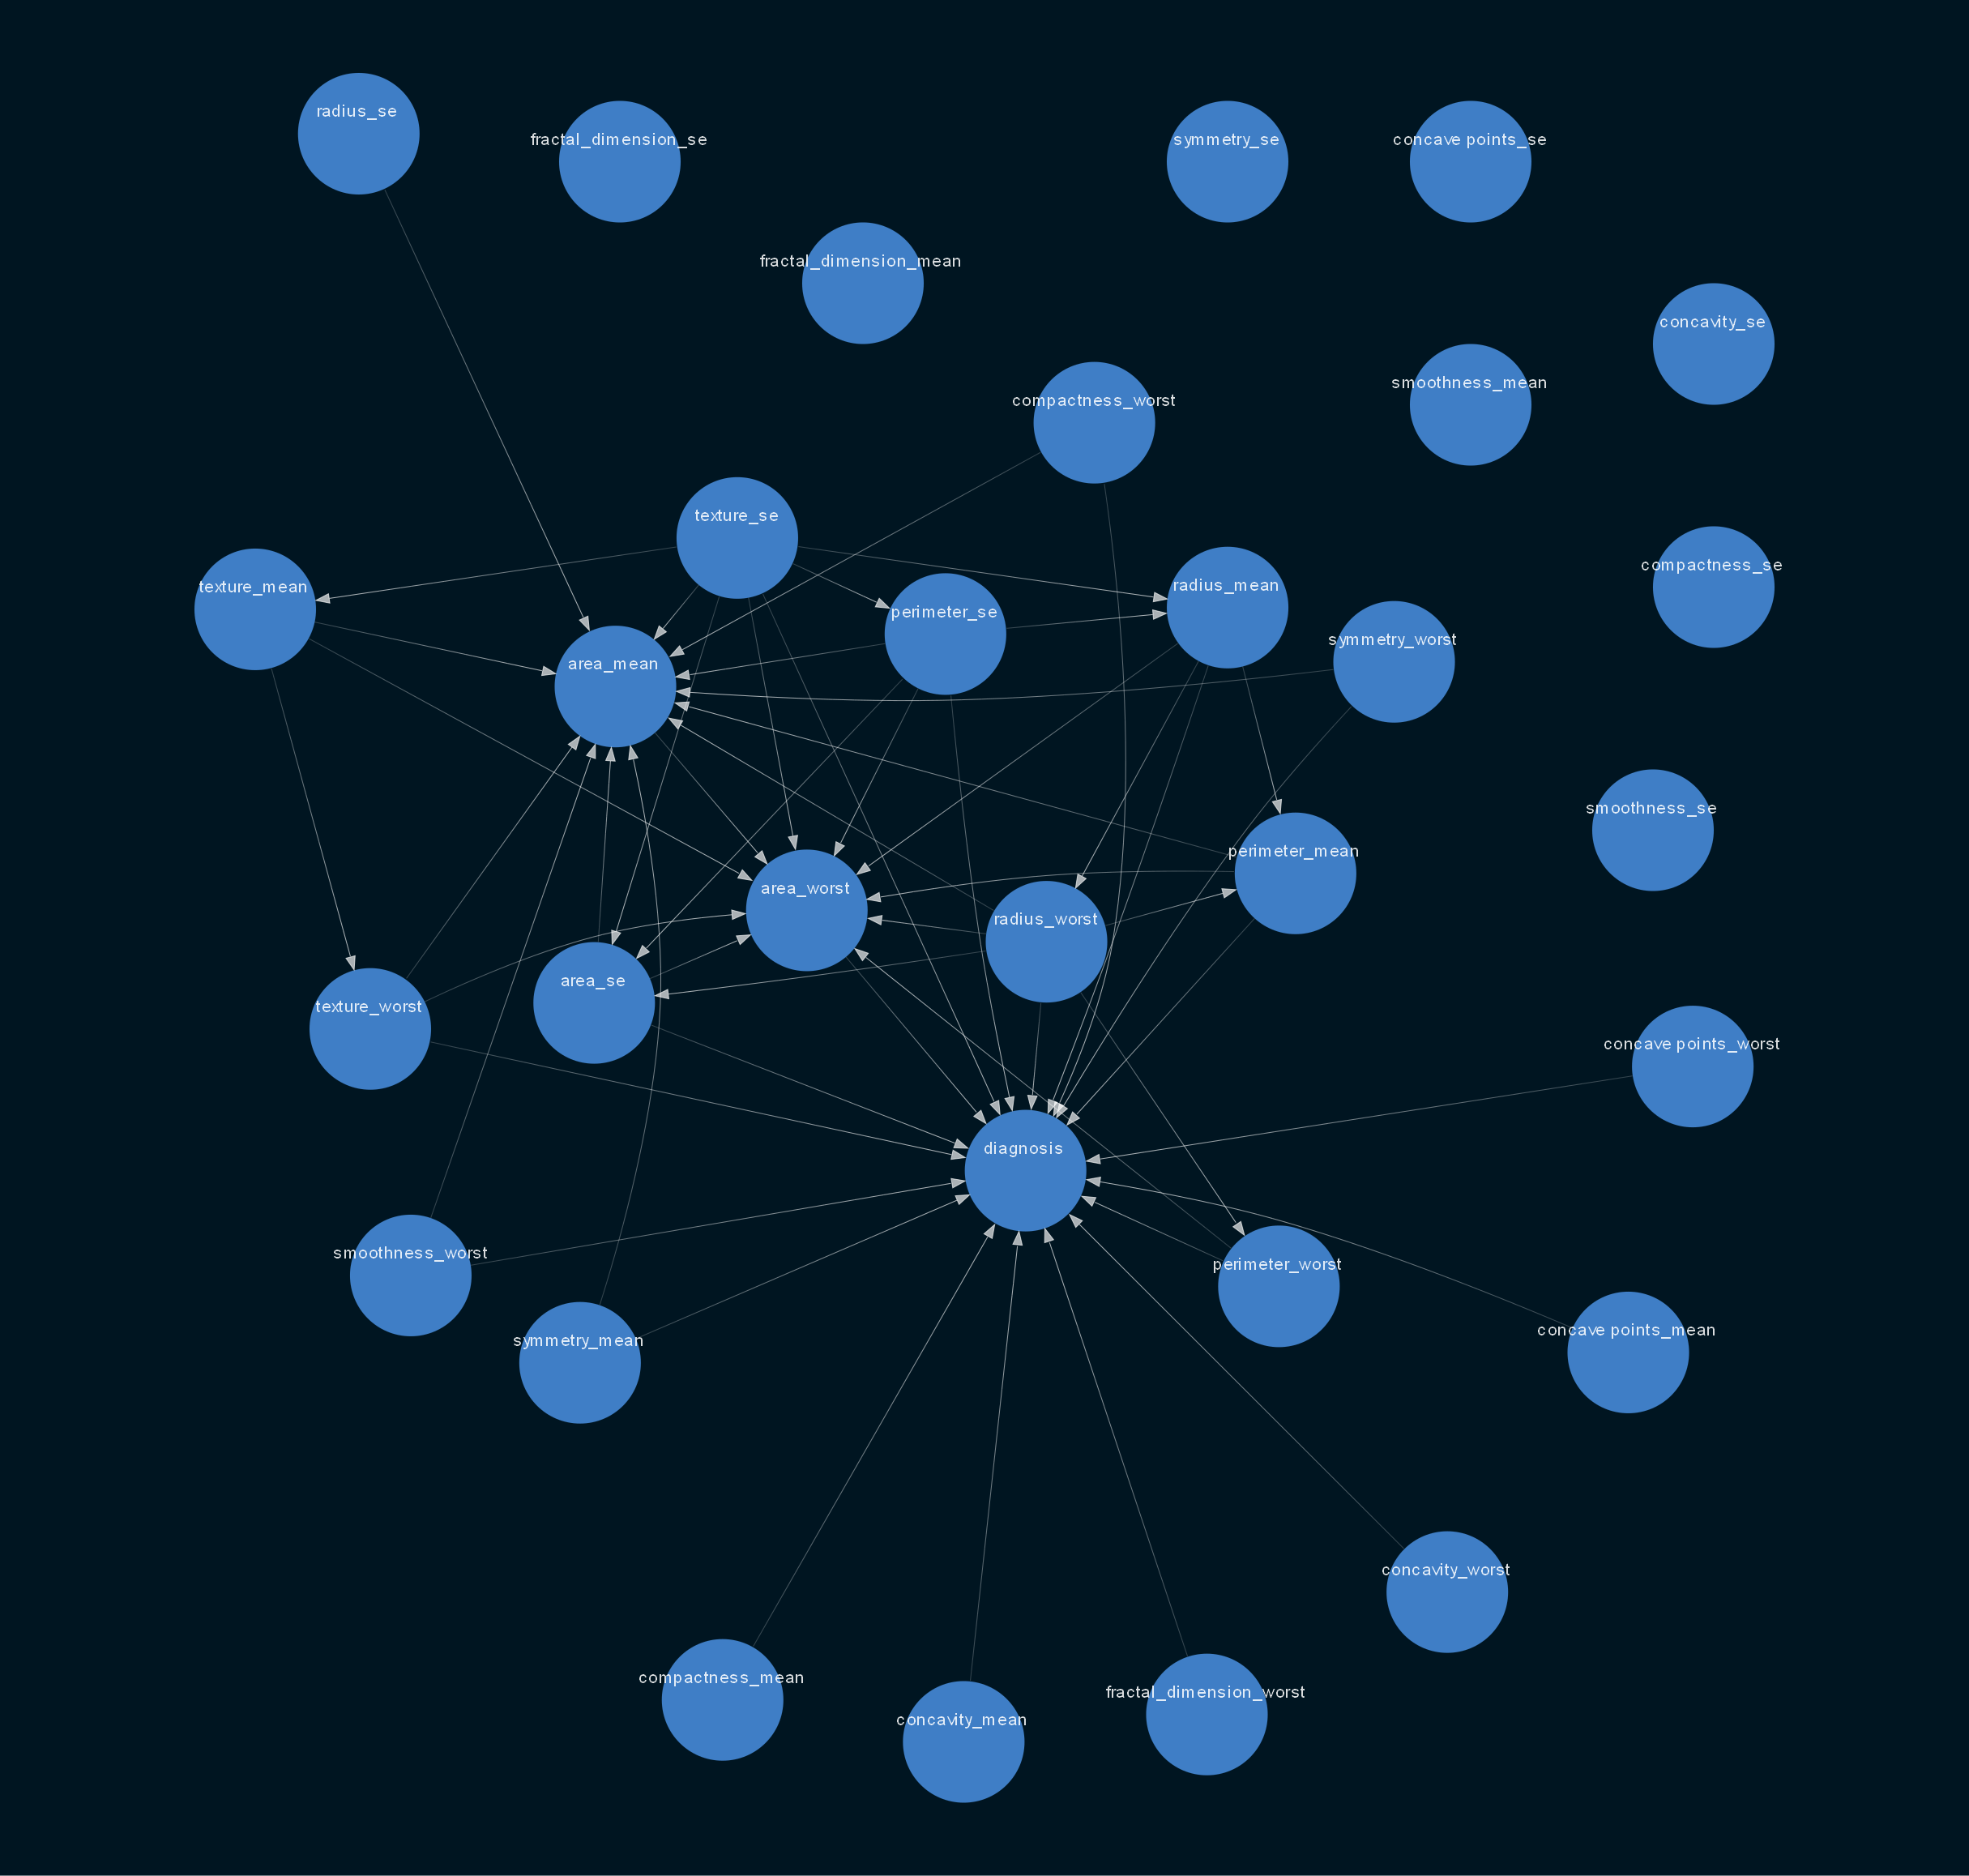

In [110]:
# Visualizing resulting graph only considering edges 0.8 and above threshold
# sm_data_1.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm_data_2,
    prog="neato",
    graph_attributes={"scale": "0.5", "size": 20},
    all_node_attributes={'fontsize': 5, "width": 0.5, "fixed_size": "false", "regular": 'True', 'labelloc':'c', "penwidth":0.1},
    all_edge_attributes=EDGE_STYLE.WEAK)

Image(viz.draw(format='png'))


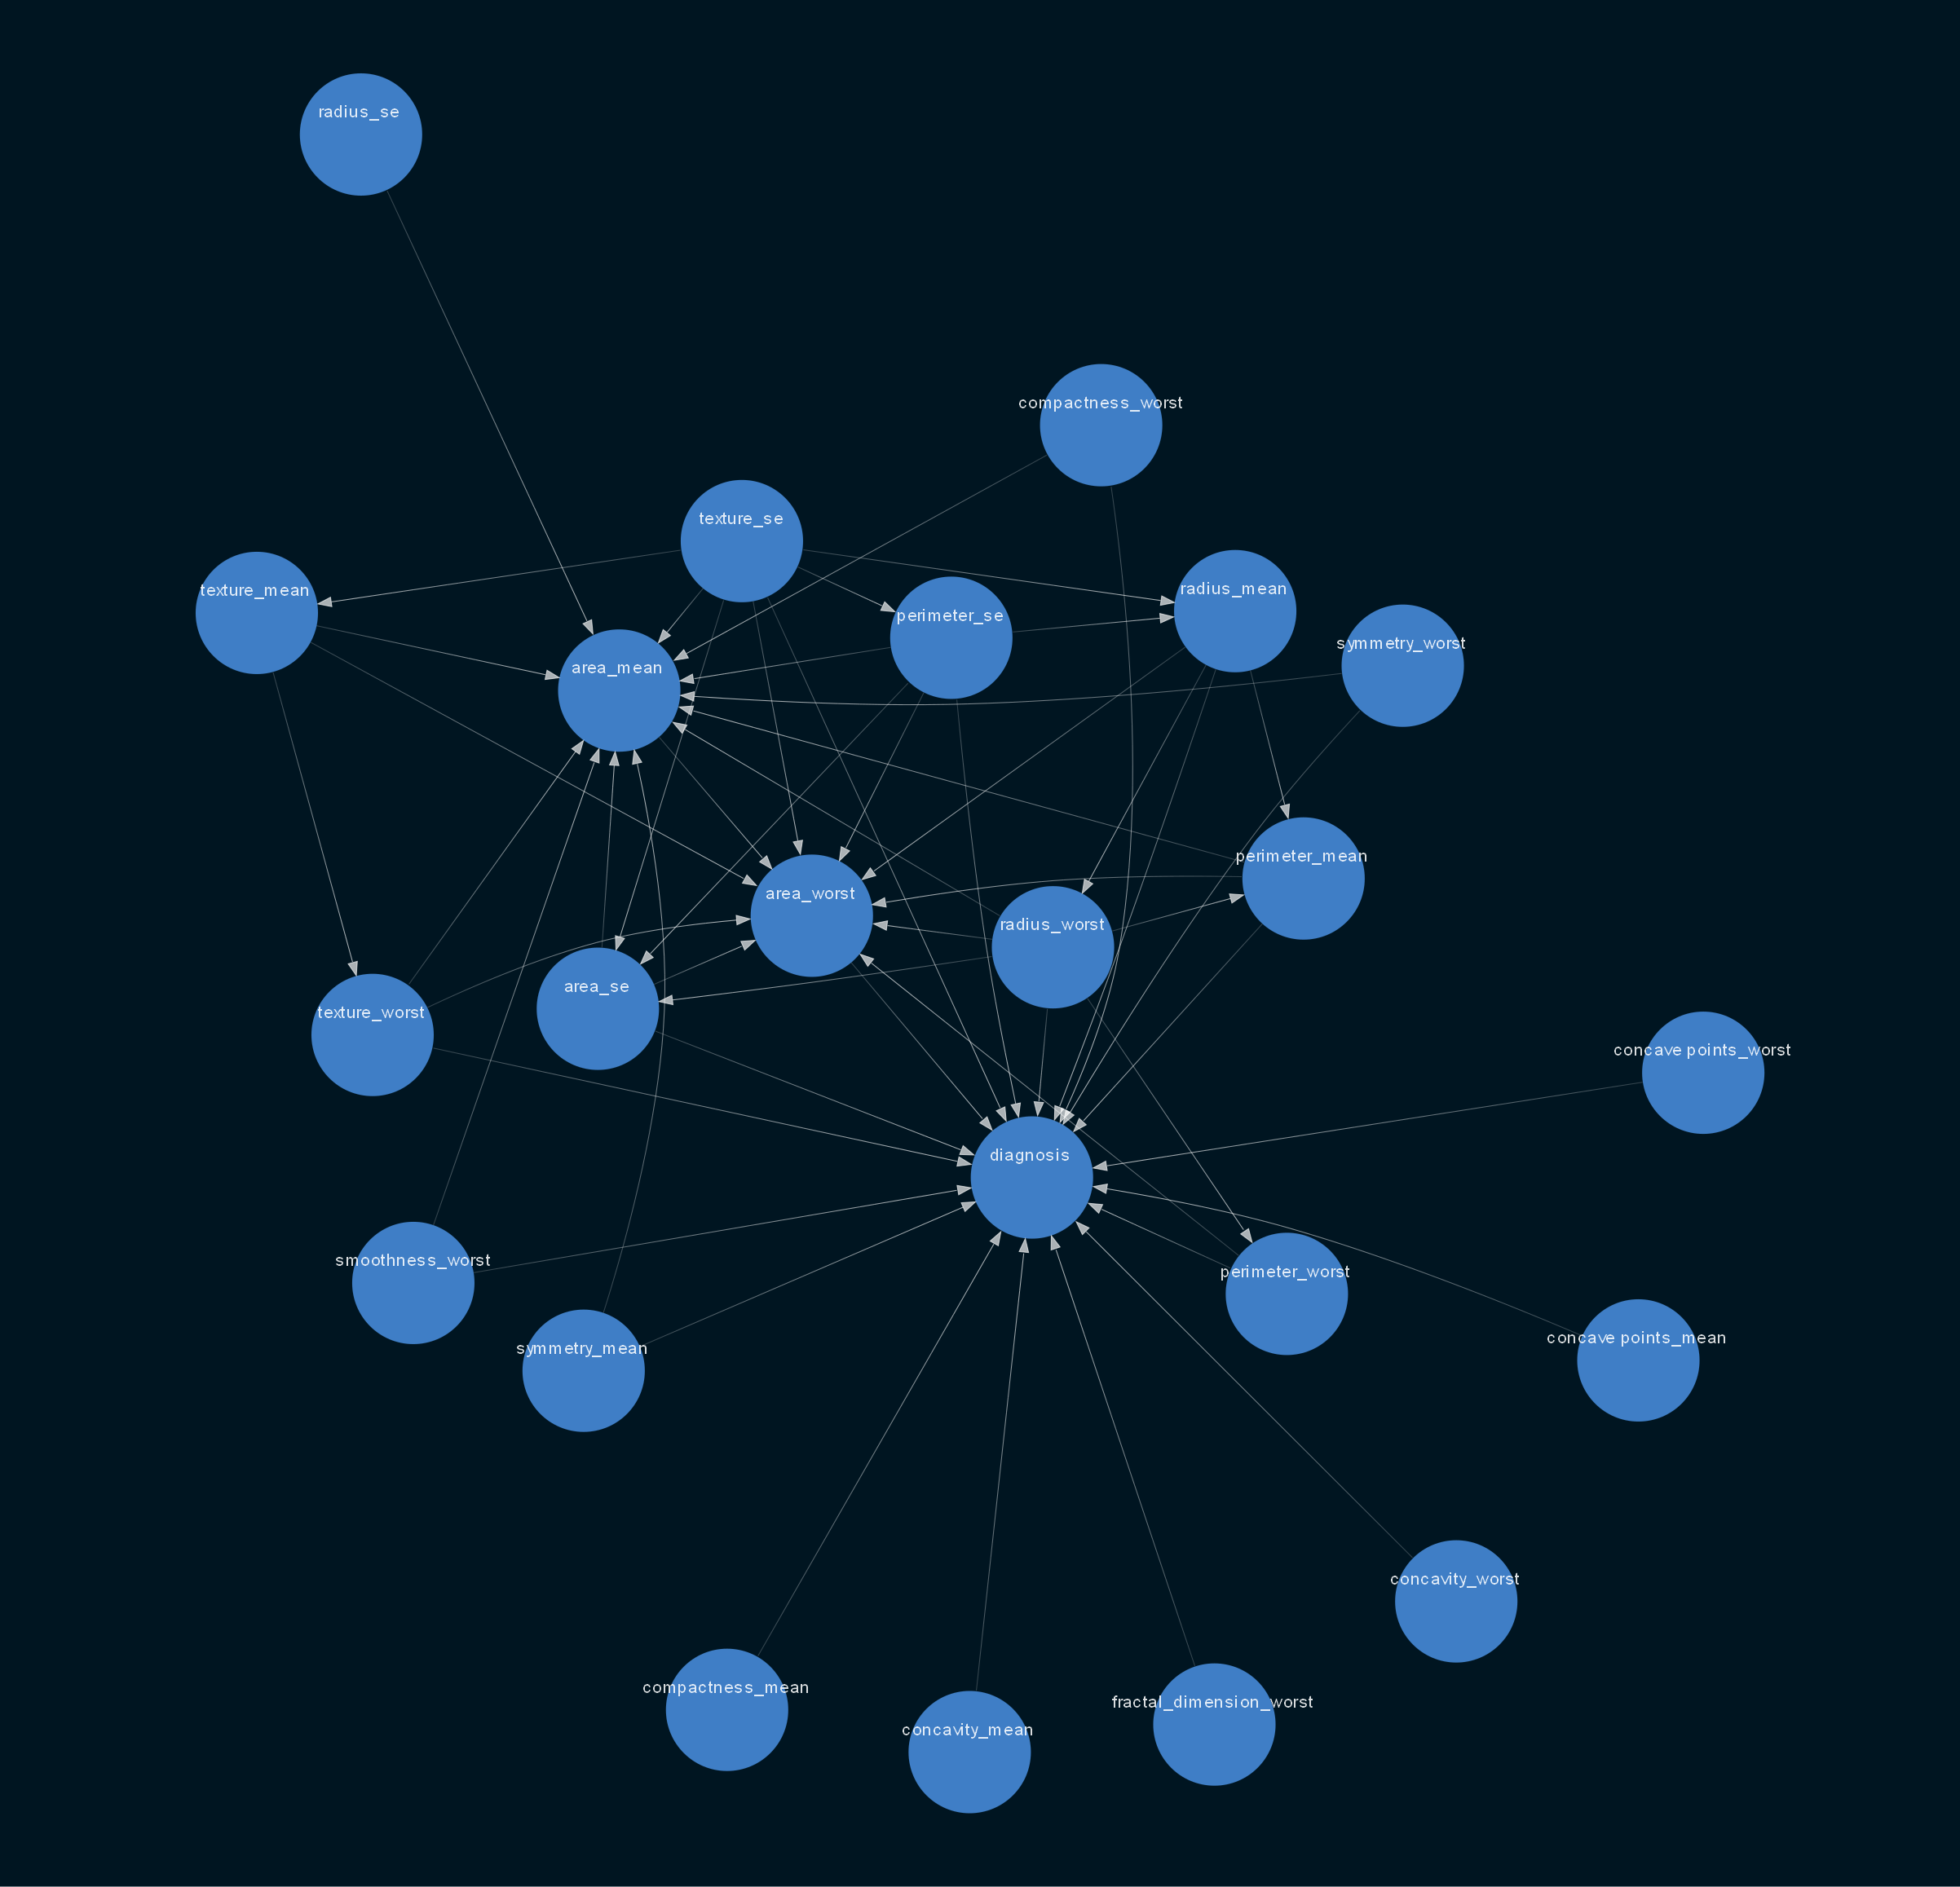

In [120]:
sm_data_2_bg = sm_data_2.get_largest_subgraph()
viz = plot_structure(
    sm_data_2_bg,
    prog="neato",
    graph_attributes={"scale": "0.5", "size": 20},
    all_node_attributes={'fontsize': 5, "width": 0.5, "fixed_size": "false",
                         "regular": 'True', 'labelloc': 'c', "penwidth": 0.1},
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


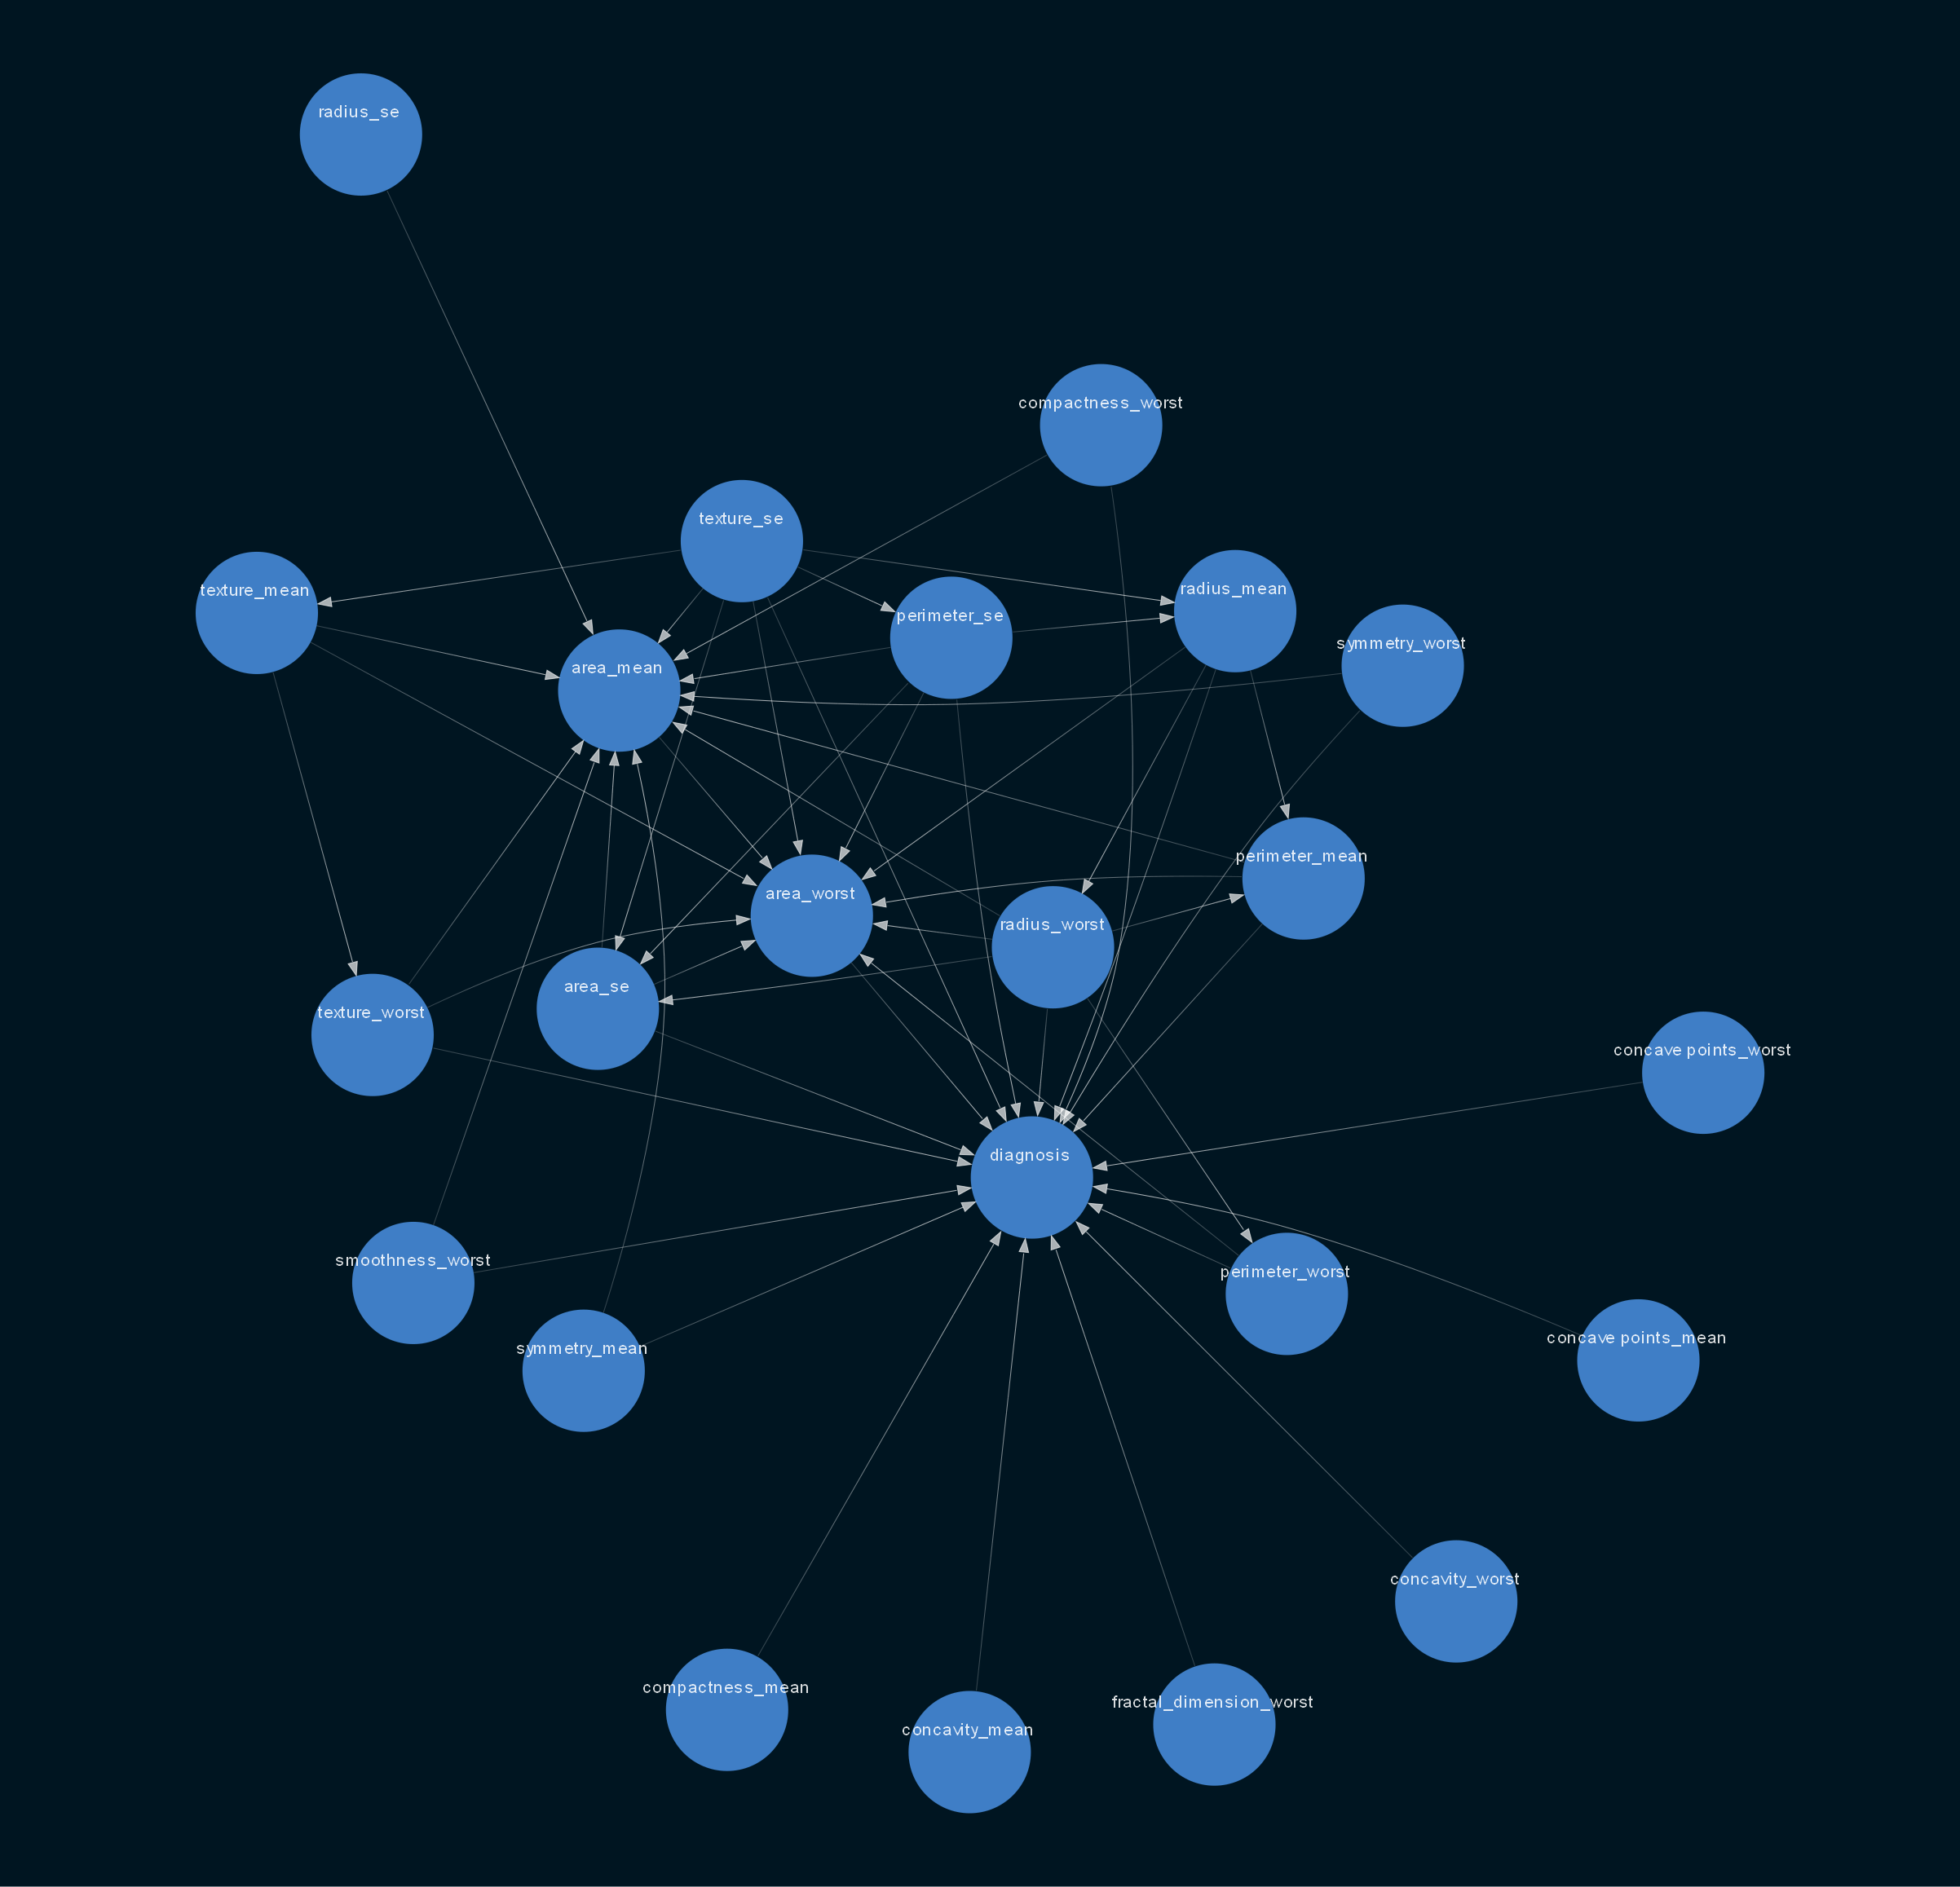

In [121]:
target = sm_data_2_bg.get_target_subgraph('diagnosis')
viz = plot_structure(
    target,
    prog="neato",
    graph_attributes={"scale": "0.5", "size": 20},
    all_node_attributes={'fontsize': 5, "width": 0.5, "fixed_size": "false",
                         "regular": 'True', 'labelloc': 'c', "penwidth": 0.1},
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


In [122]:
edges = list(target.edges())
important_features_d2 = []
for start, end in edges:
    if(end == 'diagnosis'):
        important_features_d2.append(start)

important_features_d2


['radius_mean',
 'perimeter_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'texture_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

## Comparing if both data produced similar features

In [123]:
important_features_d1 == important_features_d2

True

> ### They have similar Values

## Comparing Causal Graphs with Varying Data Size

In [124]:
len(data_2)

569

In [126]:
# Classify dataset within 100 Range
data_range_1 = data_2[:100]
data_range_2 = data_2[:200]
data_range_3 = data_2[:300]
data_range_4 = data_2[:400]

In [127]:
def calculate_jaccard_similarity(SCM_1: StructureModel, SCM_2: StructureModel) -> float:
    # Calculate Edges of SCM Graphs
    SCM_1_edges = SCM_1.edges()
    SCM_2_edges = SCM_2.edges()

    # Calculate Edge Intersections and total edges
    intersection_edges = set(SCM_1_edges).intersection(SCM_2_edges)
    total_edges = len(SCM_1_edges) + \
        len(SCM_2_edges) - len(intersection_edges)

    # Calculate jacard similarity value
    value = len(intersection_edges) / total_edges

    return round(value, 2)


In [129]:
# Constructing Causality Graph on First Cluster Dataset
sm_range_1 = from_pandas(data_range_1.iloc[:, 1:])


In [130]:
calculate_jaccard_similarity(sm_data_2, sm_range_1)

0.06

In [131]:
# Constructing Causality Graph on Second Cluster Dataset
sm_range_2 = from_pandas(data_range_2.iloc[:, 1:])


In [132]:
calculate_jaccard_similarity(sm_data_2, sm_range_2)


0.06

In [133]:
# Constructing Causality Graph on Third Cluster Dataset
sm_range_3 = from_pandas(data_range_3.iloc[:, 1:])


In [134]:
calculate_jaccard_similarity(sm_data_2, sm_range_3)


0.06

In [135]:
# Constructing Causality Graph on Fourth Cluster Dataset
sm_range_4 = from_pandas(data_range_4.iloc[:, 1:])


In [136]:
calculate_jaccard_similarity(sm_data_2, sm_range_4)


0.06

> ## Similar Jaccard Similarity Values obsereved for all ranges. No change observed.